In [ ]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 13.4 MB/s eta 0:00:00


In [ ]:
import rdkit, rdkit.Chem, rdkit.Chem.Draw
from rdkit.Chem import Descriptors
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from rdkit.Chem import Descriptors
from pandas.plotting import scatter_matrix

In [ ]:
url_corso= 'https://raw.githubusercontent.com/stefano-bosio/CTF_ML_MD/main/Lipophilicity.csv'

In [ ]:
Lipodata = pd.read_csv(url_corso)

In [ ]:
Lipodata

,CMPD_CHEMBLID,exp,smiles
0,CHEMBL596271,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14
1,CHEMBL1951080,-1.18,COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)...
2,CHEMBL1771,3.69,COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl
3,CHEMBL234951,3.37,OC[C@H](O)CN1C(=O)C(Cc2ccccc12)NC(=O)c3cc4cc(C...
4,CHEMBL565079,3.10,Cc1cccc(C[C@H](NC(=O)c2cc(nn2C)C(C)(C)C)C(=O)N...
...,...,...,...
4195,CHEMBL496929,3.85,OCCc1ccc(NC(=O)c2cc3cc(Cl)ccc3[nH]2)cc1
4196,CHEMBL199147,3.21,CCN(C1CCN(CCC(c2ccc(F)cc2)c3ccc(F)cc3)CC1)C(=O...
4197,CHEMBL15932,2.10,COc1cccc2[nH]ncc12
4198,CHEMBL558748,2.65,Clc1ccc2ncccc2c1C(=O)NCC3CCCCC3


In [ ]:
molecules=[rdkit.Chem.MolFromSmiles(smi) for smi in Lipodata['smiles']]

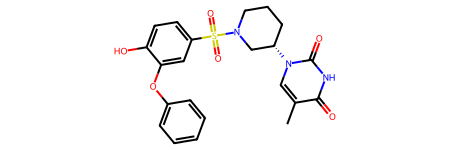

In [ ]:
molecules[100]

In [ ]:
subset=[x for x in molecules[:30]]

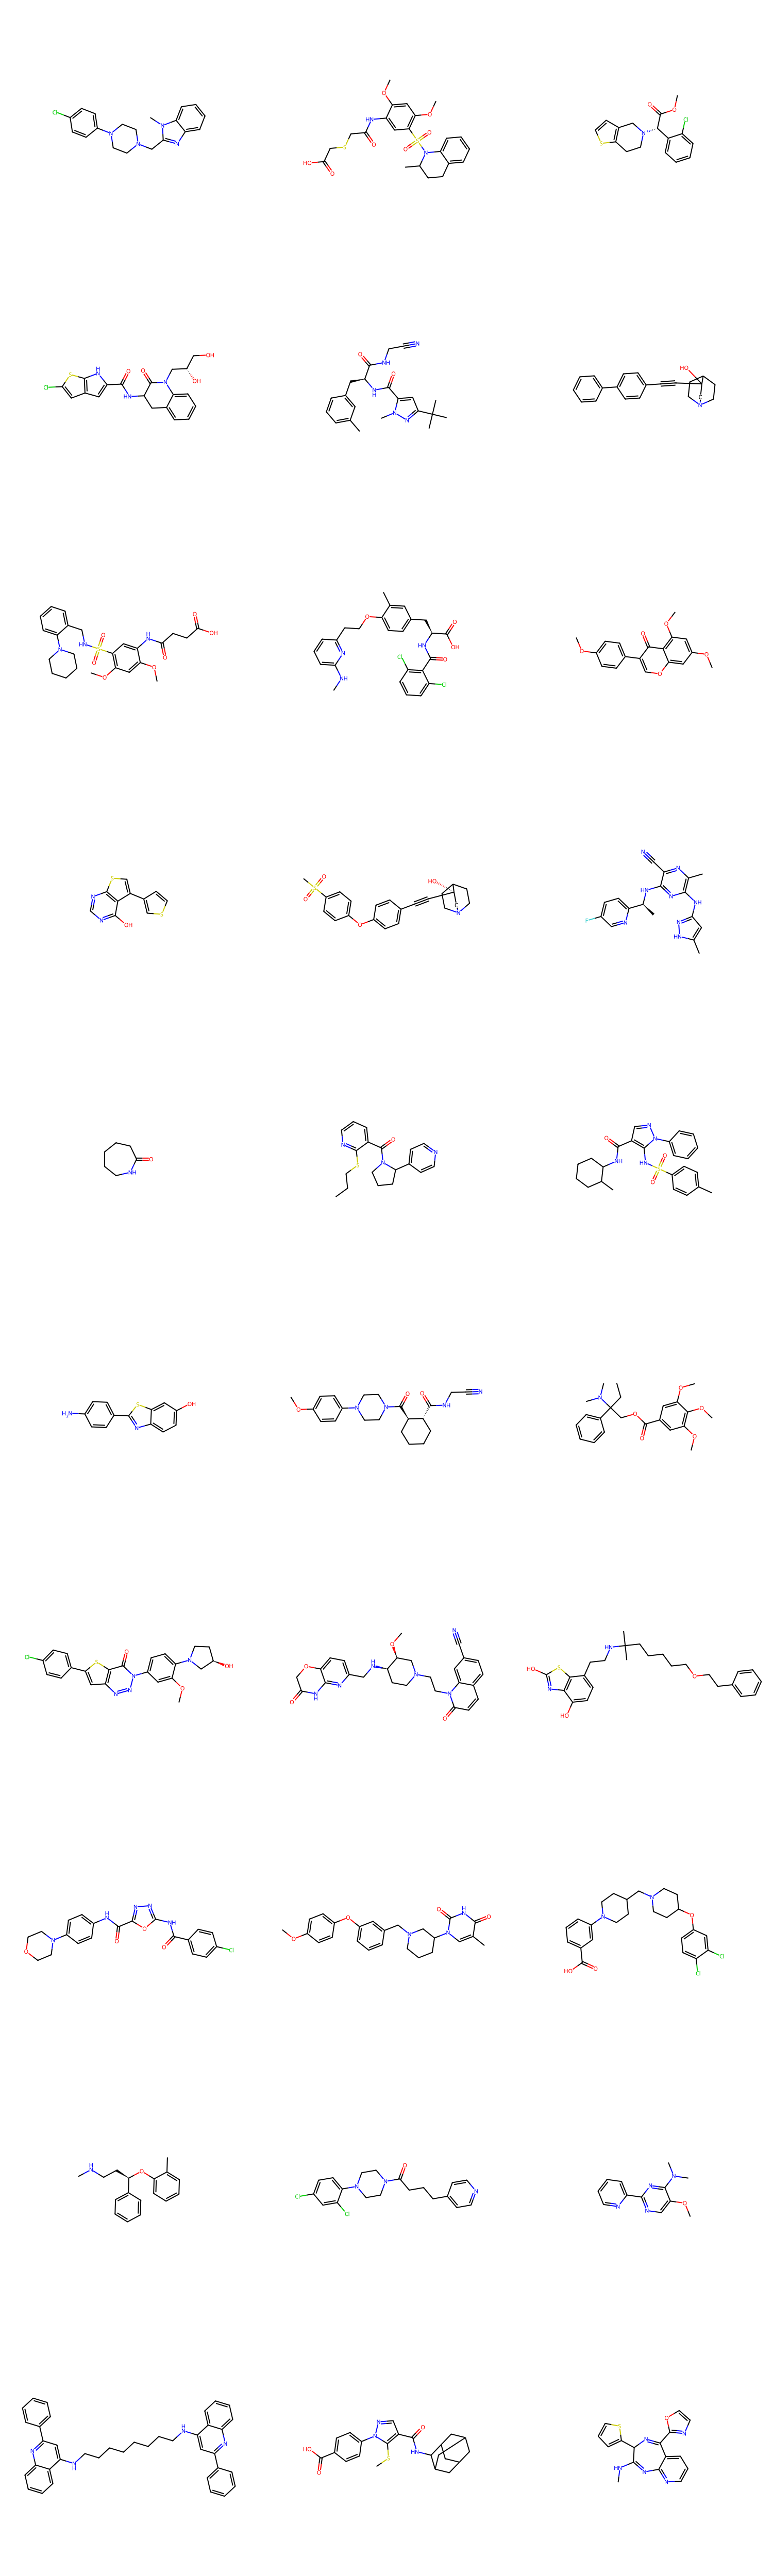

In [ ]:
img=rdkit.Chem.Draw.MolsToGridImage(subset,molsPerRow=3,subImgSize=(500,500))    
img

In [ ]:
valid_mols= [x for x in molecules if x != None]

In [ ]:
len (molecules),len(valid_mols)

(4200, 4200)

In [ ]:
features=pd.DataFrame()
for i,mol in enumerate(molecules):
    features.loc[i,'MolWt']=Descriptors.MolWt(mol)
    features.loc[i,'NumHAcceptors']=Descriptors.NumHAcceptors(mol)
    features.loc[i,'NumHDonors']=Descriptors.NumHDonors(mol)
    features.loc[i,'NumRotafeaturescBonds']=Descriptors.NumRotatableBonds(mol)
    features.loc[i,'NumHeteroatoms']=Descriptors.NumHeteroatoms(mol)
    features.loc[i,'FractionCSP3']=Descriptors.FractionCSP3(mol)
    features.loc[i,'RingCount']=Descriptors.RingCount(mol)
    features.loc[i,'TPSA']=Descriptors.TPSA(mol)
    features.loc[i,'Stereocenters']=rdkit.Chem.rdMolDescriptors.CalcNumAtomStereoCenters(mol)
    features.loc[i,'Spiro']=rdkit.Chem.rdMolDescriptors.CalcNumSpiroAtoms(mol)



In [ ]:
features

,MolWt,NumHAcceptors,NumHDonors,NumRotafeaturescBonds,NumHeteroatoms,FractionCSP3,RingCount,TPSA,Stereocenters,Spiro
0,340.858,4.0,0.0,3.0,5.0,0.315789,4.0,24.30,0.0,0.0
1,494.591,7.0,2.0,9.0,11.0,0.363636,3.0,122.24,1.0,0.0
2,321.829,4.0,0.0,3.0,5.0,0.312500,3.0,29.54,1.0,0.0
3,419.890,5.0,4.0,5.0,9.0,0.263158,4.0,105.66,2.0,0.0
4,381.480,5.0,2.0,6.0,7.0,0.428571,2.0,99.81,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4195,314.772,2.0,3.0,4.0,5.0,0.117647,3.0,65.12,0.0,0.0
4196,554.703,4.0,0.0,10.0,8.0,0.387097,4.0,57.69,0.0,0.0
4197,148.165,2.0,1.0,1.0,3.0,0.125000,2.0,37.91,0.0,0.0
4198,302.805,2.0,1.0,3.0,4.0,0.411765,3.0,41.99,0.0,0.0


## MinMaxScaler

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
feature_scaled=pd.DataFrame(MinMaxScaler().fit_transform(features), columns=features.columns)

In [ ]:
print(features.max())
print(feature_scaled.max())

array([[1.620693e+03, 2.400000e+01, 2.200000e+01, 3.500000e+01,
        4.300000e+01, 1.000000e+00, 1.300000e+01, 7.020200e+02,
        1.800000e+01, 2.000000e+00],
       [1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00]])

In [ ]:
correlations =feature_scaled.corr()
correlations

,MolWt,NumHAcceptors,NumHDonors,NumRotafeaturescBonds,NumHeteroatoms,FractionCSP3,RingCount,TPSA,Stereocenters,Spiro
MolWt,1.000000,0.619152,0.277206,0.749382,0.781367,0.338776,0.590870,0.600390,0.265812,0.022619
NumHAcceptors,0.619152,1.000000,0.294938,0.482871,0.808051,0.191395,0.428003,0.768154,0.155470,-0.007909
NumHDonors,0.277206,0.294938,1.000000,0.381763,0.381392,0.014248,0.005553,0.652192,0.295636,-0.011390
NumRotafeaturescBonds,0.749382,0.482871,0.381763,1.000000,0.547544,0.342854,0.187492,0.485026,0.190512,-0.064856
NumHeteroatoms,0.781367,0.808051,0.381392,0.547544,1.000000,0.208730,0.327317,0.817381,0.181497,-0.022038
FractionCSP3,0.338776,0.191395,0.014248,0.342854,0.208730,1.000000,0.162443,0.089553,0.435800,0.094862
RingCount,0.590870,0.428003,0.005553,0.187492,0.327317,0.162443,1.000000,0.238617,0.117283,0.125800
TPSA,0.600390,0.768154,0.652192,0.485026,0.817381,0.089553,0.238617,1.000000,0.270427,-0.002986
Stereocenters,0.265812,0.155470,0.295636,0.190512,0.181497,0.435800,0.117283,0.270427,1.000000,0.082285
Spiro,0.022619,-0.007909,-0.011390,-0.064856,-0.022038,0.094862,0.125800,-0.002986,0.082285,1.000000


In [ ]:

ticks=[x for x  in feature_scaled.columns]

In [ ]:
ticks

['MolWt',
 'NumHAcceptors',
 'NumHDonors',
 'NumRotafeaturescBonds',
 'NumHeteroatoms',
 'FractionCSP3',
 'RingCount',
 'TPSA',
 'Stereocenters',
 'Spiro']

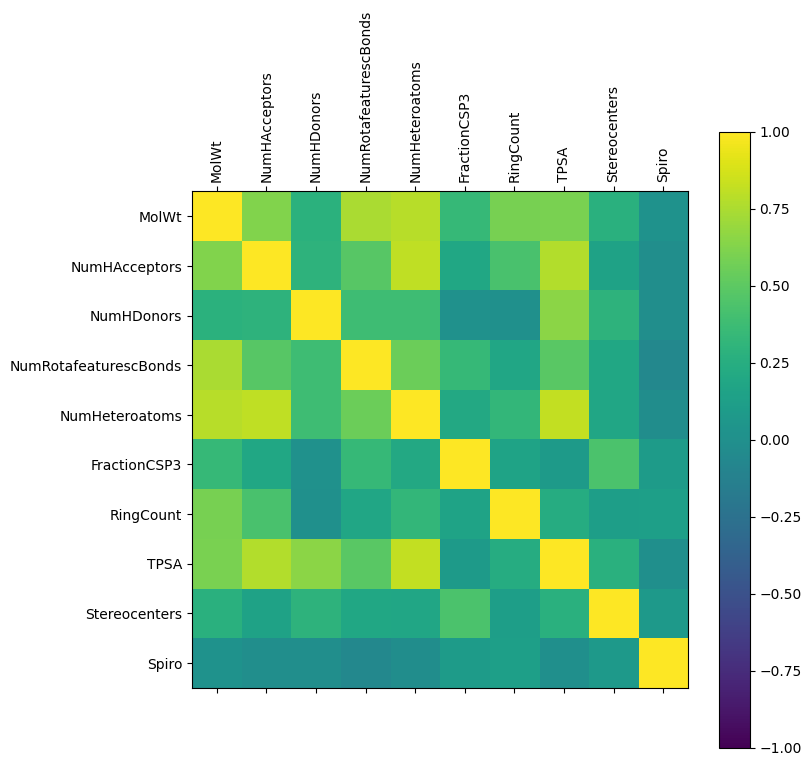

In [ ]:
plt.figure(figsize=(8,8))
plt.matshow(np.array(correlations), fignum=0)
plt.xticks(np.linspace(0,9,10),ticks,rotation= 90)
plt.yticks(np.linspace(0,9,10),ticks)
plt.colorbar()
plt.clim((-1,1))

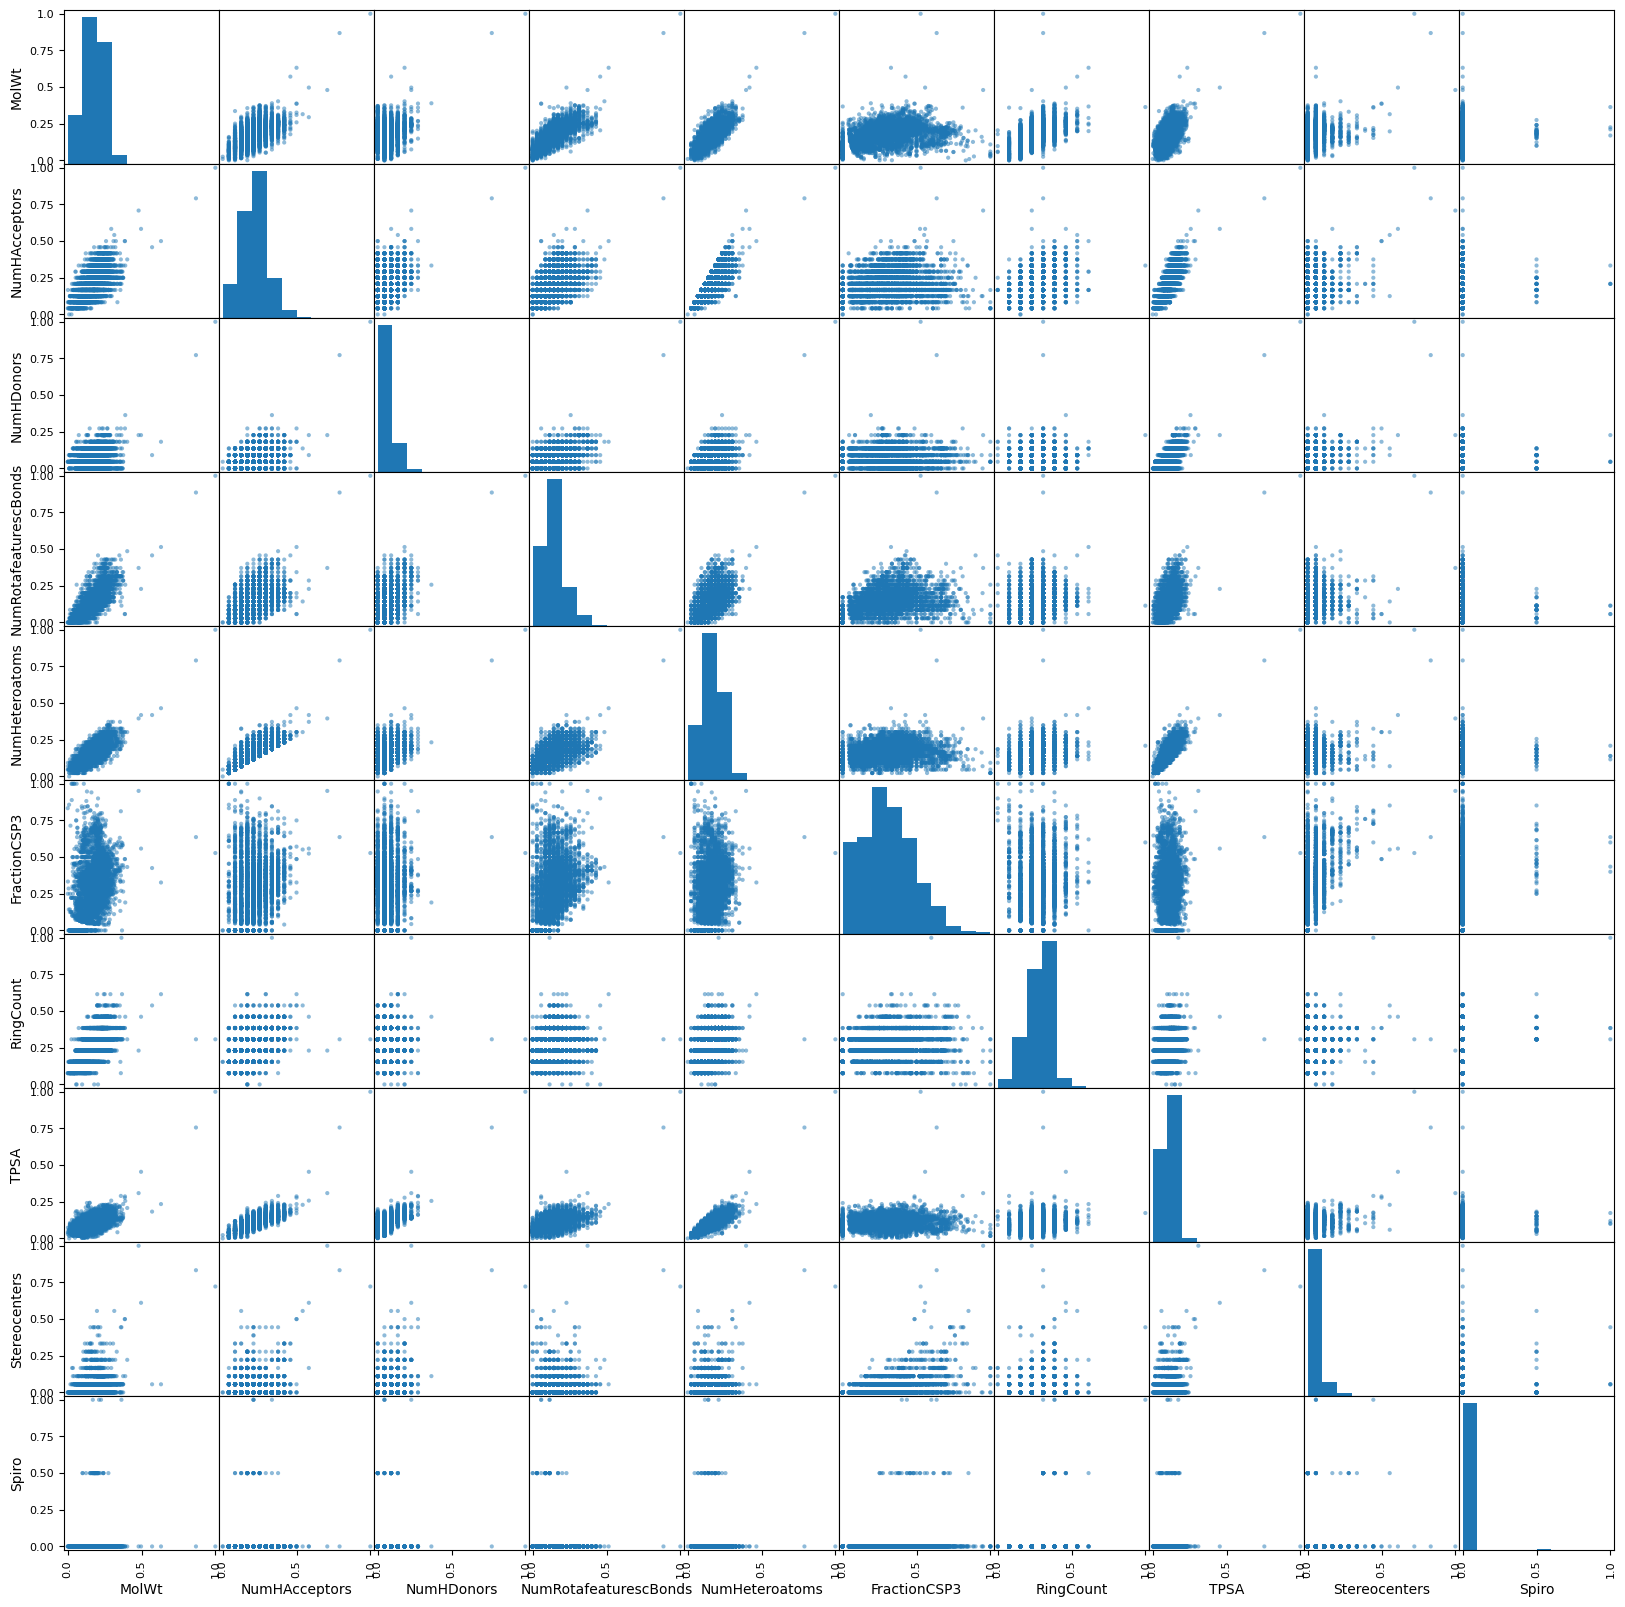

In [ ]:
scatter_matrix(feature_scaled, figsize=(20,20))
plt.show()